In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Census & gmaps API Keys
from config import (api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

## Collecting Data from Census (2013 - 2018): CA, CO, Fl, ID, OR, TX

In [34]:
# Run Census Search to retrieve data on all states

years=[2013,2014,2015,2016,2017,2018]

# Names for your columns

#Jenifer
column1 = "Population"
column2 = "Per Capita Income"
column3 = "Poverty Count"
#Natalia
column4 = "Rent(%)" #Median Rent as a Percentage of Houshold Income
column5 = "House with mortgage(%)" #Median Owner Cost for House WITH Mortgage as a Percentage of Houshold Income 
column6 = "House without mortgage(%)" #Median Owner Cost for House WITHOUT Mortgage as a Percentage of Houshold Income 
#Hossein
column7 = "Mean of Trans by Age"
column8 = "Travel Time to Work"
#Daniel (Race part)
column9 = "Race Total"
column10 = "White alone"
column11 = "Block or African American alone"
column12 = "American Indian and Alaska Native Alone"
column13 = "Asian Alone"
column14 = "Unemployement count"

median_rent_pd = pd.DataFrame()
all_years_df = pd.DataFrame()

states_list=[]
years_list=[]

column1_data =[]
column2_data =[]
column3_data =[]
column4_data =[]
column5_data =[]
column6_data =[]
column7_data =[]
column8_data =[]
column9_data =[]
column10_data =[]
column11_data =[]
column12_data =[]
column13_data =[]
column14_data =[]

state_number = []


for y in years:
    
    c = Census(api_key, year=y)
    
    #Give Names for your Groups
    median_rent_data = c.acs5.get(("NAME", "B01003_001E","B19301_001E", "B17001_002E", 
                                   "B25071_001E","B25092_002E", "B25092_003E",
                                  "B08101_001E", "B08303_001E",
                                  "B02001_001E", "B02001_002E", "B02001_003E", "B02001_004E","B02001_005E","B23025_005E"), 
                         {'for': 'state: 06, 08, 12, 16, 41, 48'})
    
        #To assing yeach value with specific year


    # Sorting to put states in the same order states in the table
    median_rent_pd = pd.DataFrame(median_rent_data).sort_values("NAME",ascending=True)
    median_rent_pd = median_rent_pd.reset_index()
    #print(median_rent_pd)
    
    year_column=[]
    for i in range(len(median_rent_pd["state"])):
        year_column.append(y)
    #print(year_column)
    
    #Adding all data into lists
    state_number.extend(median_rent_pd["state"].tolist())
    states_list.extend(median_rent_pd["NAME"].tolist())
    years_list.extend(year_column)
    column1_data.extend(median_rent_pd["B01003_001E"].tolist())
    column2_data.extend(median_rent_pd["B19301_001E"].tolist())
    column3_data.extend(median_rent_pd["B17001_002E"].tolist())
    column4_data.extend(median_rent_pd["B25071_001E"].tolist())
    column5_data.extend(median_rent_pd["B25092_002E"].tolist())
    column6_data.extend(median_rent_pd["B25092_003E"].tolist())
    column7_data.extend(median_rent_pd["B08101_001E"].tolist())
    column8_data.extend(median_rent_pd["B08303_001E"].tolist())
    column9_data.extend(median_rent_pd["B02001_001E"].tolist())
    column10_data.extend(median_rent_pd["B02001_002E"].tolist())
    column11_data.extend(median_rent_pd["B02001_003E"].tolist())
    column12_data.extend(median_rent_pd["B02001_004E"].tolist())
    column13_data.extend(median_rent_pd["B02001_005E"].tolist())
    column14_data.extend(median_rent_pd["B23025_005E"].tolist())    
    
    
#print(years_list)
#print(states_list)

all_years_df["Year"] = years_list
all_years_df["State Name"] = states_list
all_years_df["State Number"] = state_number
all_years_df[column1] = column1_data
all_years_df[column2] = column2_data
all_years_df[column3] = column3_data
all_years_df[column4] = column4_data
all_years_df[column5] = column5_data
all_years_df[column6] = column6_data
all_years_df[column7] = column7_data
all_years_df[column8] = column8_data

all_years_df[column9] = column9_data
all_years_df[column10] = column10_data
all_years_df[column11] = column11_data
all_years_df[column12] = column12_data
all_years_df[column13] = column13_data
all_years_df[column14] = column14_data

all_years_df.head()
#print(states_list)

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [35]:
# Add a Poverty Rate Column
all_years_df["Poverty Rate"] = 100 * all_years_df["Poverty Count"].astype(int)/all_years_df["Population"].astype(int)
all_years_df.head()

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count,Poverty Rate
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0,15.628107
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0,12.909387
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0,15.990687
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0,15.176422
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0,15.890988


## Migration Data (2013 - 2018): CA, CO, Fl, ID, OR, TX

In [36]:
# Adding Migration Data per state for 2013-2018
# Migration in US
# Study data files
migration_file_path = "Data/Total_Migration_2013-2018_CSV.csv"

# Reading the migration data from CSV file
migration_all_states_df = pd.read_csv(migration_file_path)

# Combine the two dataframes into a single dataset
merge_data_df = pd.merge(all_years_df,migration_all_states_df, on=["Year","State Name"])

#Column rearrangment
all_census_data = merge_data_df[['Year','State Name','State Number','Population','Move In','Move Out','Delta','Per Capita Income','Poverty Count','Poverty Rate','Rent(%)',
 'House with mortgage(%)','House without mortgage(%)','Mean of Trans by Age','Travel Time to Work','Race Total','White alone',
 'Block or African American alone','American Indian and Alaska Native Alone','Asian Alone','Unemployement count']]
all_census_data.head()

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Poverty Rate,...,House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,15.628107,...,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,206543.0,166348.0,40195.0,31109.0,660874.0,12.909387,...,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,529406.0,423995.0,105411.0,26236.0,3052807.0,15.990687,...,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,61592.0,63788.0,-2196.0,22568.0,240298.0,15.176422,...,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,143841.0,111680.0,32161.0,26809.0,614778.0,15.890988,...,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


## Writing the final DataFlame into CSV file. Path "Data/all_census_data.csv"

In [37]:
## Writing the final DataFlame into CSV file
all_census_data.to_csv("Data/all_census_data.csv",index=False)

# Analysis

## Part-I: Races in CA (Daniel)

In [40]:
# Selecting data by states
cal_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "California"]
texas_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Texas"]
colorado_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Colorado"]
florida_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Florida"]
idaho_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Idaho"]
oregon_all_years   = merge_data_df.loc[merge_data_df["State Name"]== "Oregon"]

### Race in CA

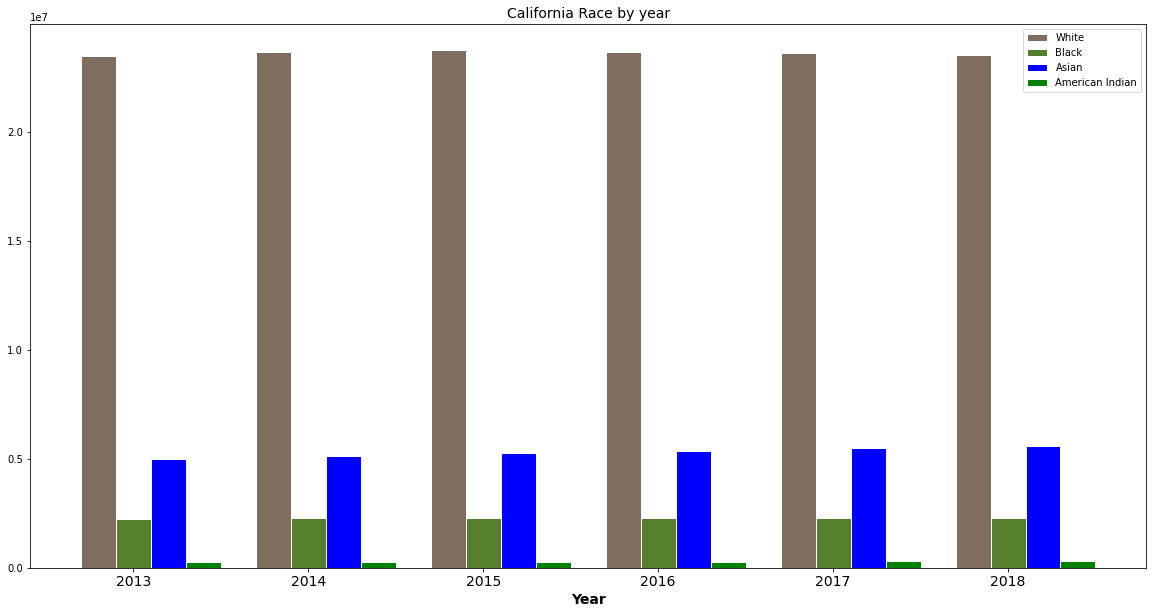

In [43]:
#Bar Chart for race info in California - Dan

plt.figure(figsize=(20,10))
# set width of bar
barWidth = 0.2

# set height of bar
bars1 = cal_all_years["White alone"]
bars2 = cal_all_years["Block or African American alone"]
bars3 = cal_all_years["Asian Alone"]
bars4 = cal_all_years["American Indian and Alaska Native Alone"]

# Set position of bar on X axis

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='White')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Black')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='American Indian')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold',fontsize=14)
plt.xticks([r + barWidth for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
plt.title("California Race by year",fontsize=14)
# Create legend & Show graphic

plt.legend()
plt.show()

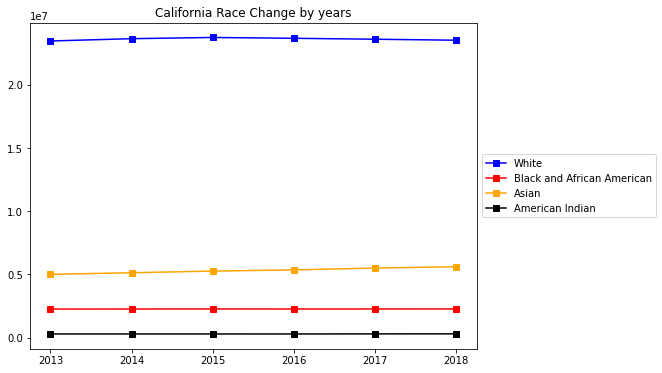

In [44]:
#California Race change- Dan
plt.figure(figsize=(8,6))
x_axis = cal_all_years["Year"]
y_axis_white = cal_all_years["White alone"]
y_axis_black = cal_all_years["Block or African American alone"]
y_axis_asian = cal_all_years["Asian Alone"]
y_axis_indian = cal_all_years["American Indian and Alaska Native Alone"]


White, = plt.plot(x_axis, y_axis_white, marker="s",color="blue", label="White")
Black, = plt.plot(x_axis, y_axis_black, marker="s",color="red", label="Black and African American")
Asian, = plt.plot(x_axis, y_axis_asian, marker="s",color="orange", label="Asian")
Indian, = plt.plot(x_axis, y_axis_indian, marker="s",color="black", label="American Indian")


# Set our legend to where the chart thinks is best
plt.title("California Race Change by years")
plt.legend(handles=[White, Black, Asian, Indian], loc="center left", bbox_to_anchor=(1, 0.5))


In [45]:
#Population vs Asian

x_values = cal_all_years["Population"]
y_values = cal_all_years['Asian Alone']

(asian_slope, asian_intercept, asian_rvalue, asian_pvalue, asian_stderr) = linregress(x_values, y_values)
asian_regress_values = x_values * asian_slope + asian_intercept
asian_line_eq = "y = " + str(round(asian_slope,2)) + "x + " + str(round(asian_intercept,2))

# plt.plot(x_values,regress_values,"red")
# plt.scatter(x_values, y_values)
# plt.xlabel("California Population")
# plt.ylabel("California Unemployment Count")
# plt.title("Population vs Asian Count")
# print(f"The P Value is :{pvalue}")
# plt.savefig('population_unemployment_scatter', dpi=300)
# plt.show()

## Part-II: Travel Time (Hossein)

## Part-III: Housing and Renting in 6 states (Natalia)

### Renting

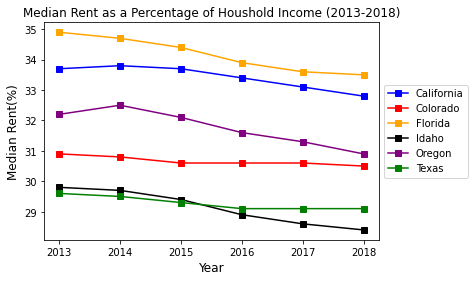

In [46]:
#Rent
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Rent(%)"]
y_axis_co = colorado_all_years["Rent(%)"]
y_axis_fl = florida_all_years["Rent(%)"]
y_axis_id = idaho_all_years["Rent(%)"]
y_axis_or = oregon_all_years["Rent(%)"]
y_axis_tx = texas_all_years["Rent(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Rent as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('Median Rent(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Rent_as_Percentage_of_Houshold_Income.png",bbox_inches='tight')

plt.show()

In [ ]:
#### *Both CA and FL have higer Rent. The cheapest state to rent id Idaho.

### Median owner cost for a house with Mortgage as percentage of houshold income 

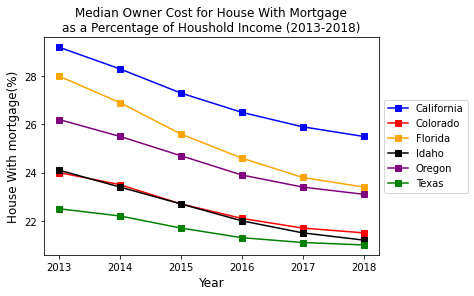

In [47]:
#Owner cost (House with Mortgage)

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["House with mortgage(%)"]
y_axis_co = colorado_all_years["House with mortgage(%)"]
y_axis_fl = florida_all_years["House with mortgage(%)"]
y_axis_id = idaho_all_years["House with mortgage(%)"]
y_axis_or = oregon_all_years["House with mortgage(%)"]
y_axis_tx = texas_all_years["House with mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Owner Cost for House With Mortgage\n'+'as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('House With mortgage(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Owner_Cost_for_House_With_Mortgage.png",bbox_inches='tight')

plt.show()

In [ ]:
#All considered states can be separated by three main groups: California the most expensive statae to buy a house with mortgage.
#The less expecive is CO, ID and TX, and became very close to each other in 2018. 
#Fl and OR are between. 

### Median owner cost for a house without Mortgage as percentage of houshold income

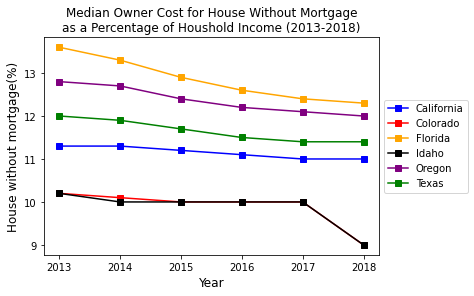

In [48]:
#Owner cost (House without Mortgage)
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["House without mortgage(%)"]
y_axis_co = colorado_all_years["House without mortgage(%)"]
y_axis_fl = florida_all_years["House without mortgage(%)"]
y_axis_id = idaho_all_years["House without mortgage(%)"]
y_axis_or = oregon_all_years["House without mortgage(%)"]
y_axis_tx = texas_all_years["House without mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Owner Cost for House Without Mortgage\n'+'as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('House without mortgage(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Owner_Cost_for_House_Without_Mortgage.png",bbox_inches='tight')

plt.show()

In [ ]:
#Conclusion #3: Situation is changed significantly if we consider the Owner Costs for the House without Mortgage.
#In this case, Fl and Oregon are the most expecive states.
#The most attractive states to have property is ID and CO.

## Part-IV:  (Sara)

## Part-V: Population, Migration, Poverty Rate (Jenifer)

In [38]:
# Filter to California only
California = all_census_data.loc[all_census_data["State Name"]=="California"]
California

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Poverty Rate,...,House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,15.628107,...,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
6,2014,California,06,38066920.0,513968.0,593308.0,-79340.0,29906.0,6115244.0,16.064457,...,28.3,11.3,16529777.0,15658667.0,38066920.0,23650913.0,2262323.0,287360.0,5130536.0,2084564.0
12,2015,California,06,38421464.0,514477.0,643710.0,-129233.0,30318.0,6135142.0,15.968007,...,27.3,11.2,16869052.0,15968724.0,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,1891081.0
18,2016,California,06,38654206.0,514758.0,657690.0,-142932.0,31458.0,6004257.0,15.533257,...,26.5,11.1,17193695.0,16259259.0,38654206.0,23680584.0,2261835.0,285512.0,5354608.0,1683726.0
24,2017,California,06,38982847.0,523131.0,661026.0,-137895.0,33128.0,5773408.0,14.810124,...,25.9,11.0,17589758.0,16611711.0,38982847.0,23607242.0,2263222.0,292018.0,5503672.0,1491146.0
30,2018,California,06,39148760.0,501023.0,691145.0,-190122.0,35021.0,5487141.0,14.016130,...,25.5,11.0,17904213.0,16883403.0,39148760.0,23529068.0,2267875.0,296475.0,5604339.0,1321502.0


# Population in CA 2013-2018

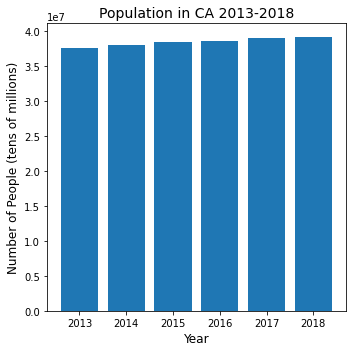

In [39]:
# assign x tick values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set figure size
plt.figure(figsize=(5,5))

# create bar graph for population in CA
plt.bar(x_axis, California["Population"])

# Set x-axis label, y-axis label, title, and legend for the bar graph
plt.xticks(tick_locations, California["Year"])
plt.title("Population in CA 2013-2018",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of People (tens of millions)",fontsize=12)


# Save as png file 
plt.savefig("Images/CAPopulation.png")

# Show fig
plt.tight_layout()
plt.show()

 - Over the years, population has been increasing.

# Migration In and Out of CA 2013-2018

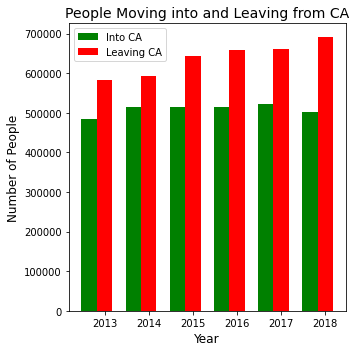

In [26]:
# Set the label and width for the bar chart
width = 0.35
bars1 = California["Move In"]
bars2 = California["Move Out"]

# Assign height and width of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

# Create bar graph 
fig, ax = plt.subplots(figsize=(5,5))
fig1 = ax.bar(r1, bars1, width, color = "green", label = "Into CA")
fig2 = ax.bar(r2, bars2, width, color = "red", label = "Leaving CA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Number of People",fontsize=12)
ax.set_xlabel("Year",fontsize=12)
ax.set_title("People Moving into and Leaving from CA",fontsize=14)
plt.xticks([r + width for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
ax.legend()

# Save as png file 
plt.savefig("Images/CAMigration.png")

# Show fig
fig.tight_layout()
plt.show()

- Even though, population in the overall state has been increasing, more people over the years have been moving out of CA.

# Per Capita Income 

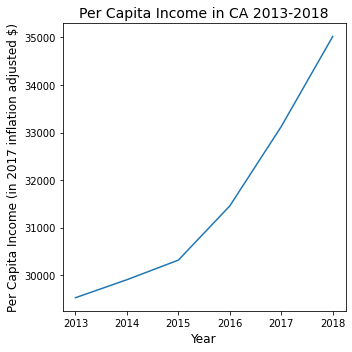

In [27]:
# assign tick locations for x values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set fig size 
plt.figure(figsize=(5,5))

# plot line graph
plt.plot(x_axis, California["Per Capita Income"])

# Set x-axis label, y-axis label, and title for the line graph
plt.xticks(tick_locations, California["Year"])
plt.title("Per Capita Income in CA 2013-2018",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Per Capita Income (in 2017 inflation adjusted $)",fontsize=12)

# Save as png file 
plt.savefig("Images/PerCapitaIncome.png")

# show fig
plt.tight_layout()
plt.show()

- Per Capita Income is used to evaluate the standard of living and qualify of life. It is calculated by Income divided by Population. Even though the Per Capita Income is increasing it does not neccessarily mean that the standard of living is increasing as well. The Per Capita Income does not take into account inflation changes over the years. The Census calculated these numbers using the 2017 inflation adjusted numbers.

# Poverty Rate

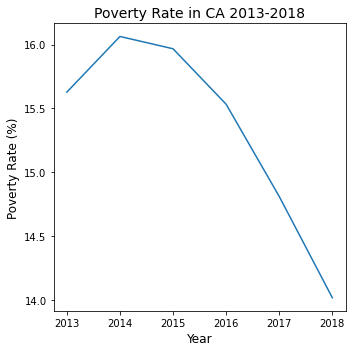

In [29]:
# assign tick locations for x values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set figure size 
plt.figure(figsize=(5,5))

# plot line graph
plt.plot(x_axis, California["Poverty Rate"])

# Set x-axis label, y-axis label, and title for the line graph
plt.xticks(tick_locations, California["Year"])
plt.title("Poverty Rate in CA 2013-2018",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Poverty Rate (%)",fontsize=12)

# Save as png file 
plt.savefig("Images/PovertyRate.png")

# show fig
plt.tight_layout()
plt.show()

- Poverty Rate has been decreasing over the years but it could be indicator of change in inflation. 

# Per Capita Income vs Poverty Rate

The r-squared is: 0.9103035368503318
The p-value is: 0.0031120944920132745


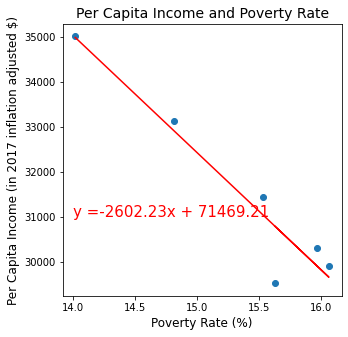

In [32]:
# set figure size 
plt.figure(figsize=(5,5))

# assign x and y values 
x_values = California["Poverty Rate"]
y_values = California["Per Capita Income"]

# calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) +"x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# add annotation, title, and labels for the scatter plot
plt.annotate(line_eq, (14,31000), fontsize= 15, color="red")
plt.title("Per Capita Income and Poverty Rate",fontsize=14)
plt.ylabel("Per Capita Income (in 2017 inflation adjusted $)",fontsize=12)
plt.xlabel("Poverty Rate (%)",fontsize=12)

# print r-squared and p-value 
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Save as png file 
plt.savefig("Images/PerCapitaPoverty.png")

# Show fig 
plt.show()

- Per Capita Income and Poverty Rate are negatively strongly correlated and significant. This is shown from the r-squared value which is .91 and the p-value that is less than .05. 

In [ ]:
## Part-II: Jenifer